## Matplotlibで作成した図をPDF化して指定のディレクトリに保存する　　
[参考資料](https://www.delftstack.com/ja/howto/matplotlib/how-to-save-plots-as-pdf-file-in-matplotlib/)  
[公式サイト](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

## ①savefig

メソッドの構文  
```
matplotlib.pyplot.savefig(fname, 
        dpi=None,   # 画質を決める
        facecolor='w', 
        edgecolor='w',
        orientation='portrait', 
        papertype=None, 
        format=None,
        transparent=False, 
        bbox_inches=None, 
        pad_inches=0.1,
        frameon=None, 
        metadata=None)
```
 パラメータセクションの fname は、作業ディレクトリを基準にしたファイルの名前とパスを表します。  
 ファイル名の拡張子として .pdf を使用すると、プロットは PDF ファイルとして保存されます。

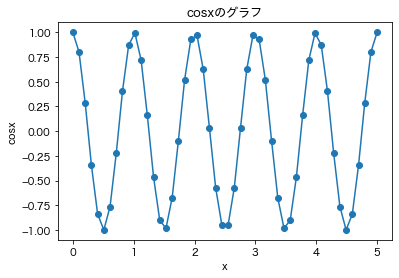

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

# output先のディレクトリとファイルのpathと名前の指定
os.chdir(f'/Users/nakamuraayaka/100knock-process-visualization/example')
graph_file = "Save Plot as PDF file using savefig.pdf"
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)


#　グラフ化
x=np.linspace(0,5,50)  # 0から5まで50等分した数値
y=np.cos(2 * np.pi * x)

plt.scatter(x, y)
plt.plot(x, y)
plt.title("cosxのグラフ")
plt.xlabel("x")
plt.ylabel("cosx")
#　保存
plt.savefig(os.path.join(output_dir, graph_file))

## ②　PdfPages クラスの savefig() メソッド  
複数のプロットを 1つにプロットしたい場合は、PdfPages クラスの savefig() メソッドを使用できます。

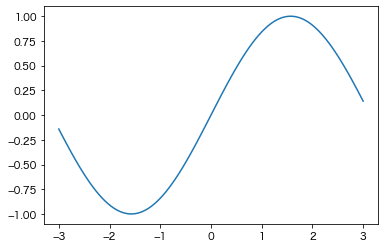

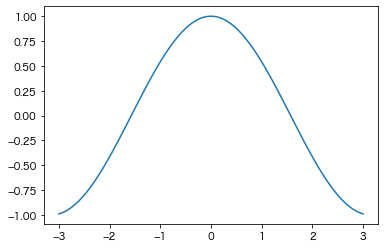

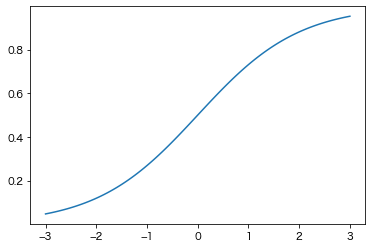

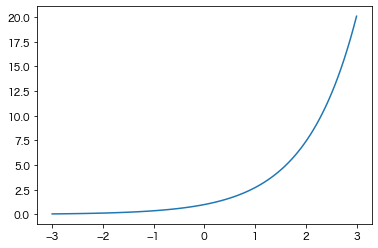

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


#output先のファイル名指定
graph_file_multi = "Save multiple plots as PDF.pdf"
#　グラフ化
x=np.linspace(-3,3,100)
y1=np.sin(x)
y2=np.cos(x)
y3=1/(1+np.exp(-x))
y4=np.exp(x)

def retFig(x, y):
    fig = plt.figure()
    a= plt.plot(x, y)
    return fig

fig1 = retFig(x, y1)
fig2 = retFig(x, y2)
fig3 = retFig(x, y3)
fig4 = retFig(x, y4)

#　保存
pp = PdfPages(os.path.join(output_dir, graph_file_multi))
pp.savefig(fig1)
pp.savefig(fig2)
pp.savefig(fig3)
pp.savefig(fig4)
pp.close()
